# LSDB.nested Toy Catalog Generation

In [1]:
import lsdb.nested
# formerly import nested_dask

from lsdb.nested.datasets import generate_data, generate_catalog
import lsdb

## Nested-Pandas NestedFrame Generation

In [5]:
from nested_pandas.datasets import generate_data

generate_data(n_base=5,n_layer=10, seed=1)

a         b                                             nested
0  0.417022  0.184677  [{t: 8.38389, flux: 10.233443, band: 'g'}; …] ...
1  0.720324  0.372520  [{t: 13.70439, flux: 41.405599, band: 'g'}; …]...
2  0.000114  0.691121  [{t: 4.089045, flux: 69.440016, band: 'g'}; …]...
3  0.302333  0.793535  [{t: 17.562349, flux: 41.417927, band: 'g'}; …...
4  0.146756  1.077633  [{t: 0.547752, flux: 4.995346, band: 'r'}; …] ...

## Modifying this for LSDB

,ra,dec,a,b,nested
npartitions=12,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],"struct<t: list<item: double>, flux: list<item:..."
"Order: 0, Pixel: 1",...,...,...,...,...
...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...


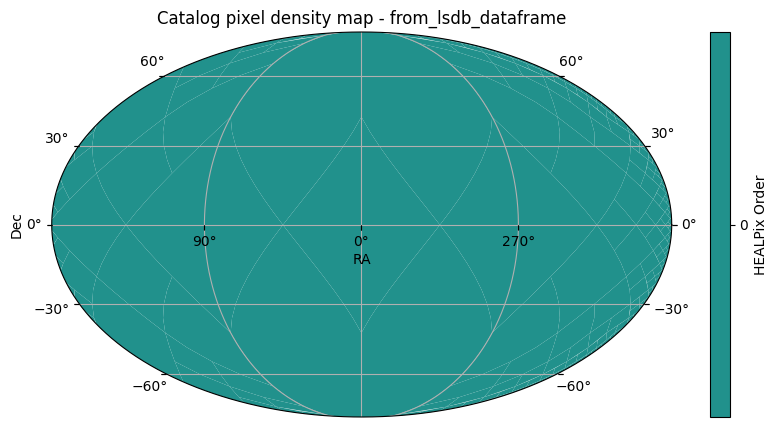

In [1]:
nf = generate_data(1000,10, seed=1)
cat = lsdb.from_dataframe(nf.compute())
cat.plot_pixels()
cat

In [14]:
nf.compute()

ra        dec         a         b  \
0    184.255785   7.618770  0.417022  0.651620   
1    342.166931  84.219023  0.720324  1.779655   
..          ...        ...       ...       ...   
998  311.638846  54.687218  0.325967  0.061996   
999  346.490320 -26.769409  0.774477  1.893457   

                                                nested  
0    [{t: 11.539557, flux: 4.298321, band: 'g', flu...  
1    [{t: 17.507775, flux: 58.040583, band: 'r', fl...  
..                                                 ...  
998  [{t: 3.369539, flux: 84.560604, band: 'g', flu...  
999  [{t: 10.581744, flux: 96.163542, band: 'r', fl...  

[1000 rows x 5 columns]

## Limited Spatial Control: RA/DEC ranges

,ra,dec,a,b,nested
npartitions=2,,,,,
"Order: 1, Pixel: 16",double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],"struct<t: list<item: double>, flux: list<item:..."
"Order: 3, Pixel: 558",...,...,...,...,...


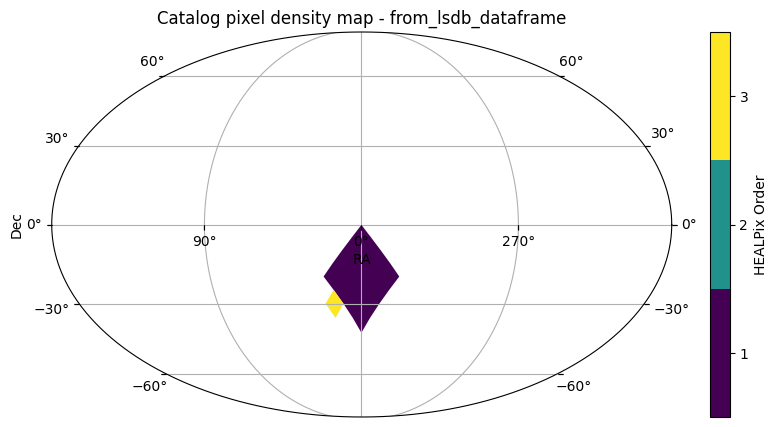

In [12]:
nf = generate_data(10000,10, seed=1, ra_range=(0.,15.), dec_range=(-30.,-25.))

cat = lsdb.from_dataframe(nf.compute())
cat.plot_pixels()
cat

## `generate_catalog` one-liner

,ra,dec,a,b,nested
npartitions=1,,,,,
"Order: 2, Pixel: 80",double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],"struct<t: list<item: double>, flux: list<item:..."


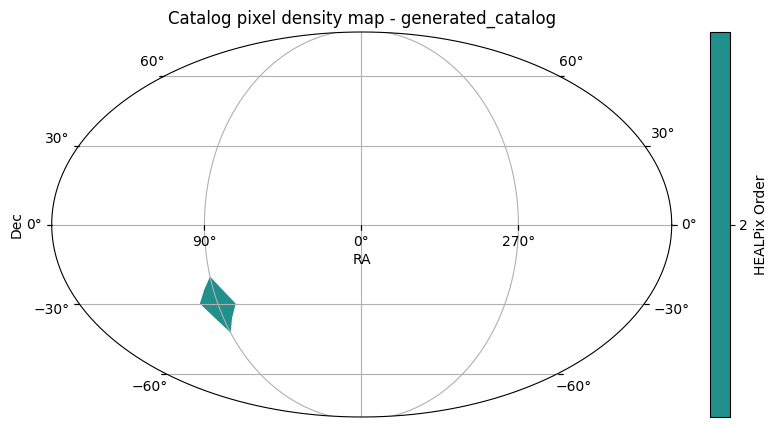

In [2]:
cat = generate_catalog(10000,10, seed=1, ra_range=(90,95), dec_range=(-30.5,-30))
cat.plot_pixels()
cat